In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import requests
np.random.seed(0)


# **Preparation of Emoticon Data**

---



In [2]:
# read emoticon dataset
train_emoticon_df = pd.read_csv("https://raw.githubusercontent.com/psarath22/CS771_M1/main/datasets/train/train_emoticon.csv")
train_emoticon_X = train_emoticon_df['input_emoticon'].tolist()
train_emoticon_Y = train_emoticon_df['label'].tolist()

valid_emoticon_df = pd.read_csv("https://raw.githubusercontent.com/psarath22/CS771_M1/main/datasets/valid/valid_emoticon.csv")
valid_emoticon_X = valid_emoticon_df['input_emoticon'].tolist()
valid_emoticon_Y = valid_emoticon_df['label'].tolist()

test_emoticon_X = pd.read_csv("https://raw.githubusercontent.com/psarath22/CS771_M1/main/datasets/test/test_emoticon.csv")['input_emoticon'].tolist()

print(f"Train dataset size: ")
print(f"train_emoticon_X: {len(train_emoticon_X)} train_emoticon_Y: {len(train_emoticon_Y)}")

print()
print("Valid dataset size: ")
print(f"valid_emoticon_X: {len(valid_emoticon_X)} valid_emoticon_Y: {len(valid_emoticon_Y)}")

print()
print("Test dataset size: ")
print(f"test_emoticon_X: {len(test_emoticon_X)}")

Train dataset size: 
train_emoticon_X: 7080 train_emoticon_Y: 7080

Valid dataset size: 
valid_emoticon_X: 489 valid_emoticon_Y: 489

Test dataset size: 
test_emoticon_X: 2232


In [3]:
# Convert list to NumPy array
train_emoticon_X = np.array(train_emoticon_X)
valid_emoticon_X = np.array(valid_emoticon_X)
test_emoticon_X = np.array(test_emoticon_X)

train_emoticon_Y = np.array(train_emoticon_Y)
valid_emoticon_Y = np.array(valid_emoticon_Y)

print(type(train_emoticon_X))
print(type(train_emoticon_X[0]))

# Concatenate all lists into one
all_texts = ''.join(train_emoticon_X.flatten()) + ''.join(valid_emoticon_X.flatten()) + ''.join(test_emoticon_X.flatten())

# Get unique characters
unique_characters = np.unique(list(all_texts))
print(unique_characters)
# Create a mapping from characters to indices
char_to_index = {char: idx for idx, char in enumerate(unique_characters)}
print(unique_characters.shape)
print(len(char_to_index))

<class 'numpy.ndarray'>
<class 'numpy.str_'>
['😀' '😁' '😂' '😃' '😄' '😅' '😆' '😇' '😈' '😉' '😊' '😋' '😌' '😍' '😎' '😏' '😐' '😑'
 '😒' '😓' '😔' '😕' '😖' '😗' '😘' '😙' '😚' '😛' '😜' '😝' '😞' '😟' '😠' '😡' '😢' '😣'
 '😤' '😥' '😦' '😧' '😨' '😩' '😪' '😫' '😬' '😭' '😮' '😯' '😰' '😱' '😲' '😳' '😴' '😵'
 '😶' '😷' '😸' '😹' '😺' '😻' '😼' '😽' '😾' '😿' '🙀' '🙁' '🙂' '🙃' '🙄' '🙅' '🙆' '🙇'
 '🙈' '🙉' '🙊' '🙋' '🙌' '🙍' '🙎' '🙏' '🙐' '🙑' '🙒' '🙓' '🙔' '🙕' '🙖' '🙗' '🙘' '🙙'
 '🙚' '🙛' '🙜' '🙝' '🙞' '🙟' '🙠' '🙡' '🙢' '🙣' '🙤' '🙥' '🙦' '🙧' '🙨' '🙩' '🙪' '🙫'
 '🙬' '🙭' '🙮' '🙯' '🙰' '🙱' '🙲' '🙳' '🙴' '🙵' '🙶' '🙷' '🙸' '🙹' '🙺' '🙻' '🙼' '🙽'
 '🙾' '🙿' '🚀' '🚁' '🚂' '🚃' '🚄' '🚅' '🚆' '🚇' '🚈' '🚉' '🚊' '🚋' '🚌' '🚍' '🚎' '🚏'
 '🚐' '🚑' '🚒' '🚓' '🚔' '🚕' '🚖' '🚗' '🚘' '🚙' '🚚' '🚛' '🚜' '🚝' '🚞' '🚟' '🚠' '🚡'
 '🚢' '🚣' '🚤' '🚥' '🚦' '🚧' '🚨' '🚩' '🚪' '🚫' '🚬' '🚭' '🚮' '🚯' '🚰' '🚱' '🚲' '🚳'
 '🚴' '🚵' '🚶' '🚷' '🚸' '🚹' '🚺' '🚻' '🚼' '🚽' '🚾' '🚿' '🛀' '🛁' '🛂' '🛃' '🛄' '🛅'
 '🛆' '🛇' '🛈' '🛉' '🛊' '🛋' '🛌' '🛍' '🛎' '🛏' '🛐' '🛑' '🛒' '🛓' '🛔' '🛕' '🛖' '🛗'
 '\U0001f6d8' '\U0001f6d9' '\U0001f6da' '\U0001f6db' '\U0001f6dc'
 '\U0001f6dd'

In [4]:
# Function to convert input emoticons to a 13x226 matrix
def one_hot_count_matrix(emoticon, max_len=13, num_classes=226):
    # Initialize a matrix of zeros
    matrix = np.zeros((max_len, num_classes))
    # Iterate through the characters in the emoticon
    for i, char in enumerate(emoticon):
        if char in char_to_index:  # Check if char exists in the mapping
            matrix[i, char_to_index[char]] = 1  # One-hot encoding
        else:
            print(f"Character '{char}' not found in char_to_index.")  # Optional: log missing characters
    return matrix.flatten()  # Flatten to a vector for SVM input

# Create the training and validation datasets
train_emoticon_X = np.array([one_hot_count_matrix(emoticon) for emoticon in train_emoticon_X])
valid_emoticon_X = np.array([one_hot_count_matrix(emoticon) for emoticon in valid_emoticon_X])
test_emoticon_X = np.array([one_hot_count_matrix(emoticon) for emoticon in test_emoticon_X])

print(train_emoticon_X.shape)
print(valid_emoticon_X.shape)
print(test_emoticon_X.shape)

(7080, 2938)
(489, 2938)
(2232, 2938)


# **Preparation of Feature Data**

In [5]:
# URL of the raw .npz file
url_train = "https://github.com/psarath22/CS771_M1/raw/main/datasets/train/train_feature.npz"
url_valid = "https://github.com/psarath22/CS771_M1/raw/main/datasets/valid/valid_feature.npz"
url_test = "https://github.com/psarath22/CS771_M1/raw/main/datasets/test/test_feature.npz"
# Download the file
response1 = requests.get(url_train)
response2= requests.get(url_valid)
response3 = requests.get(url_test)

# Save the content to a file
with open('train_feature.npz', 'wb') as f:
    f.write(response1.content)
    print("Downloading TrainData completed!")

# Save the content to a file
with open('valid_feature.npz', 'wb') as f:
    f.write(response2.content)
    print("Downloading validData completed!")

# Save the content to a file
with open('test_feature.npz', 'wb') as f:
    f.write(response3.content)
    print("Downloading TestData completed!")


# read feat dataset
train_feat = np.load("train_feature.npz", allow_pickle=True)
train_feat_X = train_feat['features']
train_feat_Y = train_feat['label']

test_feat_X = np.load("test_feature.npz", allow_pickle=True)['features']

valid_feat = np.load("valid_feature.npz", allow_pickle=True)
valid_feat_X = valid_feat['features']
valid_feat_Y = valid_feat['label']


print(f"Train dataset size: ")
print(f"train_feat_X: {len(train_feat_X)} train_feat_Y: {len(train_feat_Y)}")

print()
print("Valid dataset size: ")
print(f"valid_feat_X: {len(valid_feat_X)} valid_feat_Y: {len(valid_feat_Y)}")

print()
print("Test dataset size: ")
print(f"test_feat_X: {len(test_feat_X)}")


Train dataset size: 
train_feat_X: 7080 train_feat_Y: 7080

Valid dataset size: 
valid_feat_X: 489 valid_feat_Y: 489

Test dataset size: 
test_feat_X: 2232


In [6]:

# Create the training and validation  dataset

train_feat_X = np.array([feat for feat in train_feat_X])
valid_feat_X = np.array([feat for feat in valid_feat_X])
test_feat_X = np.array([feat for feat in test_feat_X])

train_feat_X = np.array([feat.flatten() for feat in train_feat_X])
valid_feat_X = np.array([feat.flatten() for feat in valid_feat_X])
test_feat_X = np.array([feat.flatten() for feat in test_feat_X])

from sklearn.decomposition import PCA
n_components = 150
pca = PCA(n_components=n_components)
train_feat_X = pca.fit_transform(train_feat_X)
valid_feat_X = pca.transform(valid_feat_X)
test_feat_X = pca.transform(test_feat_X)
print(train_feat_X.shape)
print(valid_feat_X.shape)
print(test_feat_X.shape)

(7080, 150)
(489, 150)
(2232, 150)


# **preparation of Sequence Dataset**

In [7]:
# read text sequence dataset
train_seq_df = pd.read_csv('https://raw.githubusercontent.com/psarath22/CS771_M1/main/datasets/train/train_text_seq.csv')
train_seq_X = train_seq_df['input_str'].tolist()
train_seq_Y = train_seq_df['label'].tolist()

test_seq_X = pd.read_csv("https://raw.githubusercontent.com/psarath22/CS771_M1/main/datasets/test/test_text_seq.csv")['input_str'].tolist()

# read text sequence dataset
valid_seq_df = pd.read_csv("https://raw.githubusercontent.com/psarath22/CS771_M1/main/datasets/valid/valid_text_seq.csv")
valid_seq_X = valid_seq_df['input_str'].tolist()
valid_seq_Y = valid_seq_df['label'].tolist()


# Convert list to NumPy array
train_seq_X = np.array(train_seq_X)
valid_seq_X = np.array(valid_seq_X)
test_seq_X = np.array(test_seq_X)

# Convert labels to numpy arrays
train_seq_Y = np.array(train_seq_Y)
valid_seq_Y = np.array(valid_seq_Y)

In [8]:

# Get unique characters for two digits
unique_characters = [f"{i:02d}" for i in range(100)]  # ['00', '01', ..., '99']
num_classes = len(unique_characters)  # 100 classes

# Create a mapping from characters to indices
char_to_index = {char: idx for idx, char in enumerate(unique_characters)}

# Function to convert input seqs to a 49x100 matrix using overlapping pairs
def one_hot_count_matrix(seq, max_len=50):
    # Initialize a matrix of zeros
    matrix = np.zeros((max_len - 1, num_classes))  # 49x100 matrix for overlapping pairs
    # Extract overlapping pairs and update the matrix
    for i in range(0, max_len - 1):  # Loop from seq[0:2] to seq[48:50]
        char_pair = seq[i:i + 2]  # Get overlapping pairs of characters
        if char_pair in char_to_index:
            index = char_to_index[char_pair]
            matrix[i, index] = 1  # One-hot encoding
    return matrix.flatten()  # Flatten to a vector for SVM input

# Create the training and validation datasets
train_seq_X = np.array([one_hot_count_matrix(seq) for seq in train_seq_X])
valid_seq_X = np.array([one_hot_count_matrix(seq) for seq in valid_seq_X])
test_seq_X = np.array([one_hot_count_matrix(seq) for seq in test_seq_X])

print(train_seq_X.shape)  # Expected shape: (N_train, 4900)
print(valid_seq_X.shape)  # Expected shape: (N_valid, 4900)
print(test_seq_X.shape)  # Expected shape: (N_test, 4900)


(7080, 4900)
(489, 4900)
(2232, 4900)


# **Final Data Set**

In [9]:
X_train = np.concatenate((train_emoticon_X, train_feat_X, train_seq_X), axis=1)
X_valid = np.concatenate((valid_emoticon_X, valid_feat_X, valid_seq_X), axis=1)
X_test = np.concatenate((test_emoticon_X, test_feat_X, test_seq_X), axis=1)

print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

Y_train = train_emoticon_Y
Y_valid = valid_emoticon_Y

num_features = 2938 + 150 + 4900
print(f"no.of features : {num_features}")

from sklearn.decomposition import PCA
n_components = 300
pca = PCA(n_components=n_components)
X_train = pca.fit_transform(X_train)
X_valid = pca.transform(X_valid)
X_test = pca.transform(X_test)
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

print(f"reduced no.of features : {n_components}")

(7080, 7988)
(489, 7988)
(2232, 7988)
no.of features : 7988
(7080, 300)
(489, 300)
(2232, 300)
reduced no.of features : 300


# **Logistic Regression**

In [10]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression classifier
logreg_classifier = LogisticRegression(max_iter=1000)
logreg_classifier.fit(X_train, Y_train)

# Predict classes for validation data
valid_predictions = logreg_classifier.predict(X_valid)
train_predictions = logreg_classifier.predict(X_train)

# Calculate training accuracy
train_accuracy = accuracy_score(Y_train, train_predictions)
print(f"Train Accuracy with Logistic Regression: {train_accuracy}")

# Calculate validation accuracy
valid_accuracy = accuracy_score(Y_valid, valid_predictions)
print(f"Validation Accuracy with Logistic Regression: {valid_accuracy}")

f1 = f1_score(Y_valid, valid_predictions, average='weighted')
print(f"F1 Score with Logistic Regression: {f1}")

# Calculate the number of trainable parameters
n_weights = logreg_classifier.coef_.size  # Number of weights (features)
n_intercepts = logreg_classifier.intercept_.size  # Number of intercepts (bias term)

n_trainable_parameters = n_weights + n_intercepts
print(f"Number of trainable parameters: {n_trainable_parameters}")

Train Accuracy with Logistic Regression: 0.9867231638418079
Validation Accuracy with Logistic Regression: 0.9877300613496932
F1 Score with Logistic Regression: 0.9877300613496932
Number of trainable parameters: 301


0.2
0.4
0.6
0.8
1.0
   Percentage  Training Accuracy  Validation Accuracy
0          20           0.999294             0.918200
1          40           0.995056             0.959100
2          60           0.990113             0.971370
3          80           0.988171             0.977505
4         100           0.986723             0.987730


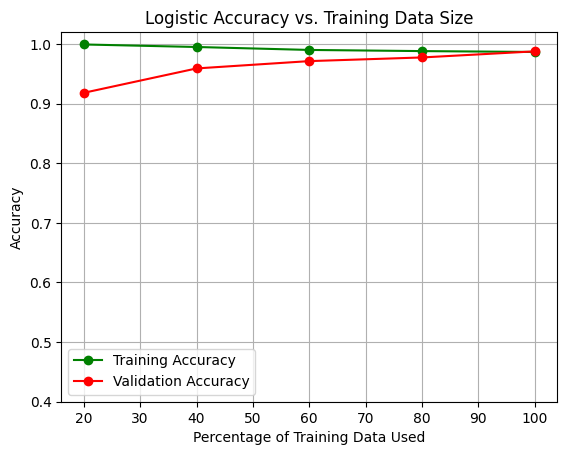

In [11]:


# Split the training data into different sizes (20%, 40%, 60%, 80%, 100%)
train_percentages = [0.2, 0.4, 0.6, 0.8, 1.0]  # Adjust 100% to a very close float value
train_accuracies = []
valid_accuracies = []

# Logistic classifier with different portions of the training data
for percentage in train_percentages:
    # Split the training data
    print(percentage)
    if(percentage == 1.0):
        X_train_subset = X_train
        Y_train_subset = Y_train
    else:
      X_train_subset, _, Y_train_subset, _ = train_test_split(X_train, Y_train, train_size=percentage, random_state=42)

    # Train Logistic Regression classifier
    logreg_classifier = LogisticRegression(max_iter=1000)
    logreg_classifier.fit(X_train_subset, Y_train_subset)

    # Predictions and accuracy on training data
    train_predictions = logreg_classifier.predict(X_train_subset)
    train_accuracy = accuracy_score(Y_train_subset, train_predictions)
    train_accuracies.append(train_accuracy)

    # Predictions and accuracy on validation data
    valid_predictions = logreg_classifier.predict(X_valid)
    valid_accuracy = accuracy_score(Y_valid, valid_predictions)
    valid_accuracies.append(valid_accuracy)
# Create a DataFrame to print the table
data = {
    "Percentage": [int(p * 100) for p in train_percentages],
    "Training Accuracy": train_accuracies,
    "Validation Accuracy": valid_accuracies
}

accuracy_df = pd.DataFrame(data)
print(accuracy_df)

# Plot the accuracies with different colors for train and validation accuracy
plt.plot([int(p * 100) for p in train_percentages], train_accuracies, label='Training Accuracy', color='green', marker='o')
plt.plot([int(p * 100) for p in train_percentages], valid_accuracies, label='Validation Accuracy', color='red', marker='o')

# Add labels and title
plt.ylim(0.4, 1.02)
plt.xlabel('Percentage of Training Data Used')
plt.ylabel('Accuracy')
plt.title('Logistic Accuracy vs. Training Data Size')

# Display legend
plt.legend()

# Add grid for better readability
plt.grid(True)

# Show the plot
plt.show()

# **KNN**

In [12]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can change the number of neighbors (n_neighbors)
knn_classifier.fit(X_train, Y_train)

# Predict classes for validation data
valid_predictions = knn_classifier.predict(X_valid)
train_predictions = knn_classifier.predict(X_train)

# Calculate training accuracy
train_accuracy = accuracy_score(Y_train, train_predictions)
print(f"Train Accuracy with KNN: {train_accuracy:}")

# Calculate validation accuracy
valid_accuracy = accuracy_score(Y_valid, valid_predictions)
print(f"Validation Accuracy with KNN: {valid_accuracy}")

f1 = f1_score(Y_valid, valid_predictions, average='weighted')
print(f"F1 Score with KNN Regression: {f1}")


Train Accuracy with KNN: 0.7946327683615819
Validation Accuracy with KNN: 0.6789366053169734
F1 Score with KNN Regression: 0.6786458857745327


# **LwP**

In [13]:
# Function to compute class prototypes (LWP model)
def compute_class_prototypes(X_train, Y_train):
    """Compute the mean prototype for each class."""
    class_0_prototype = X_train[Y_train == 0].mean(axis=0)
    class_1_prototype = X_train[Y_train == 1].mean(axis=0)
    return class_0_prototype, class_1_prototype

# Function to predict based on LWP (distance to prototypes)
def predict_lwp(X_valid, class_0_prototype, class_1_prototype):
    """Predict labels based on distance to prototypes."""
    predictions = []
    for x in X_valid:
        # Compute distances to each prototype
        distance_to_class_0 = np.linalg.norm(x - class_0_prototype)
        distance_to_class_1 = np.linalg.norm(x - class_1_prototype)

        # Assign the class with the closer prototype
        if distance_to_class_0 < distance_to_class_1:
            predictions.append(0)
        else:
            predictions.append(1)

    return np.array(predictions)

# Compute prototypes for the two classes
class_0_prototype, class_1_prototype = compute_class_prototypes(X_train, Y_train)

# Predict on the training data for LWP model
train_predictions_lwp = predict_lwp(X_train, class_0_prototype, class_1_prototype)
train_accuracy_lwp = accuracy_score(Y_train, train_predictions_lwp)
print(f"Train Accuracy with LWP: {train_accuracy_lwp}")

# Predict on the validation data for LWP model
valid_predictions_lwp = predict_lwp(X_valid, class_0_prototype, class_1_prototype)
valid_accuracy_lwp = accuracy_score(Y_valid, valid_predictions_lwp)
print(f"Validation Accuracy with LWP: {valid_accuracy_lwp}")

# Calculate F1 score for LWP model
f1_lwp = f1_score(Y_valid, valid_predictions_lwp, average='weighted')
print(f"F1 Score with LWP: {f1_lwp}")


Train Accuracy with LWP: 0.9433615819209039
Validation Accuracy with LWP: 0.9447852760736196
F1 Score with LWP: 0.9447935937362456


   Percentage  Training Accuracy (LWP)  Validation Accuracy (LWP)
0          20                 0.926554                   0.897751
1          40                 0.924082                   0.930470
2          60                 0.933616                   0.932515
3          80                 0.945798                   0.950920
4         100                 0.943362                   0.944785


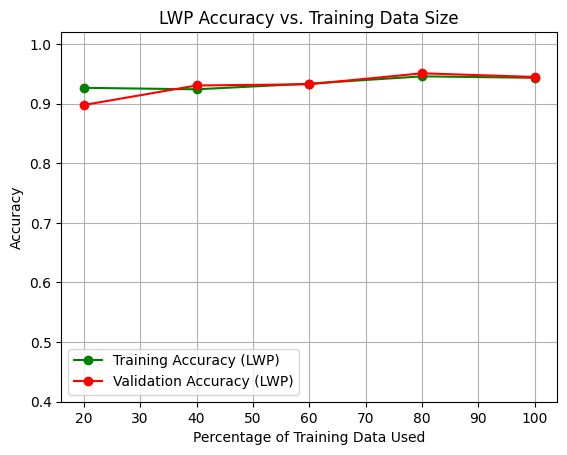

In [14]:
# Evaluate LWP model with different percentages of the training data
train_percentages = [0.2, 0.4, 0.6, 0.8, 1.0]  # Adjust 100% to a very close float value
train_accuracies_lwp = []
valid_accuracies_lwp = []

# LWP classifier with different portions of the training data
for percentage in train_percentages:
    # Split the training data
    if percentage == 1.0:
        X_train_subset = X_train
        Y_train_subset = Y_train
    else:
        X_train_subset, _, Y_train_subset, _ = train_test_split(X_train, Y_train, train_size=percentage, random_state=42)

    # Compute prototypes for the subset
    class_0_prototype, class_1_prototype = compute_class_prototypes(X_train_subset, Y_train_subset)

    # Predictions and accuracy on training data
    train_predictions = predict_lwp(X_train_subset, class_0_prototype, class_1_prototype)
    train_accuracy = accuracy_score(Y_train_subset, train_predictions)
    train_accuracies_lwp.append(train_accuracy)

    # Predictions and accuracy on validation data
    valid_predictions = predict_lwp(X_valid, class_0_prototype, class_1_prototype)
    valid_accuracy = accuracy_score(Y_valid, valid_predictions)
    valid_accuracies_lwp.append(valid_accuracy)

# Create a DataFrame to display the LWP statistics
lwp_data = {
    "Percentage": [int(p * 100) for p in train_percentages],
    "Training Accuracy (LWP)": train_accuracies_lwp,
    "Validation Accuracy (LWP)": valid_accuracies_lwp
}

lwp_accuracy_df = pd.DataFrame(lwp_data)
print(lwp_accuracy_df)

# Plot the accuracies for LWP with different percentages of training data
plt.plot([int(p * 100) for p in train_percentages], train_accuracies_lwp, label='Training Accuracy (LWP)', color='green', marker='o')
plt.plot([int(p * 100) for p in train_percentages], valid_accuracies_lwp, label='Validation Accuracy (LWP)', color='red', marker='o')

# Add labels and title
plt.ylim(0.4, 1.02)
plt.xlabel('Percentage of Training Data Used')
plt.ylabel('Accuracy')
plt.title('LWP Accuracy vs. Training Data Size')

# Display legend
plt.legend()

# Add grid for better readability
plt.grid(True)

# Show the plot
plt.show()


# **SVM Classifier**

In [15]:
# Train SVM classifier
svm_classifier = SVC(kernel='linear')  # You can also experiment with other kernels
svm_classifier.fit(X_train, Y_train)

# Predict classes for validation data
valid_predictions = svm_classifier.predict(X_valid)
train_predictions = svm_classifier.predict(X_train)

# Calculate validation accuracy
train_accuracy = accuracy_score(Y_train, train_predictions)
print(f"Train Accuracy with SVM: {train_accuracy}")

# Calculate validation accuracy
valid_accuracy = accuracy_score(Y_valid, valid_predictions)
print(f"Validation Accuracy with SVM: {valid_accuracy}")

f1 = f1_score(Y_valid, valid_predictions, average='weighted')
print(f"F1 Score with SVM: {f1}")

n_weights = svm_classifier.coef_.size  # Number of weights
n_intercepts = svm_classifier.intercept_.size  # Number of intercepts
n_params = n_weights + n_intercepts
print(f"Number of trainable parameters: {n_params}")

Train Accuracy with SVM: 0.9877118644067797
Validation Accuracy with SVM: 0.9734151329243353
F1 Score with SVM: 0.9734039965487858
Number of trainable parameters: 301


0.2
0.4
0.6
0.8
1.0
   Percentage  Training Accuracy  Validation Accuracy
0          20           0.999294             0.901840
1          40           0.992232             0.946830
2          60           0.988230             0.975460
3          80           0.988347             0.979550
4         100           0.987712             0.973415


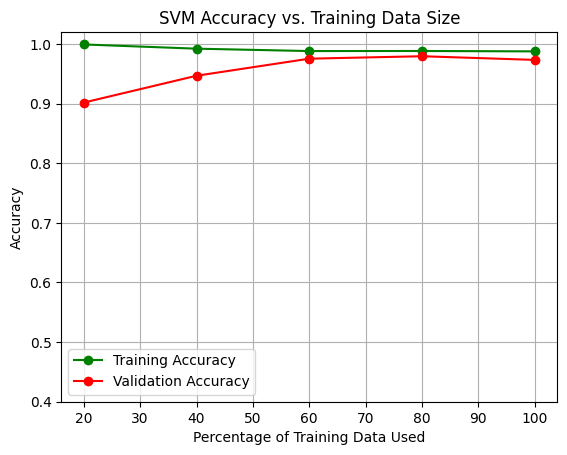

In [16]:
# Split the training data into different sizes (20%, 40%, 60%, 80%, 100%)
train_percentages = [0.2, 0.4, 0.6, 0.8, 1.0]  # Adjust 100% to a very close float value
train_accuracies = []
valid_accuracies = []

# Train SVM classifier with different portions of the training data
for percentage in train_percentages:
    # Split the training data
    print(percentage)
    if(percentage == 1.0):
        X_train_subset = X_train
        Y_train_subset = Y_train
    else:
      X_train_subset, _, Y_train_subset, _ = train_test_split(X_train, Y_train, train_size=percentage, random_state=42)

    # Train SVM classifier
    svm_classifier = SVC(kernel='linear')  # You can experiment with other kernels if needed
    svm_classifier.fit(X_train_subset, Y_train_subset)

    # Predictions and accuracy on training data
    train_predictions = svm_classifier.predict(X_train_subset)
    train_accuracy = accuracy_score(Y_train_subset, train_predictions)
    train_accuracies.append(train_accuracy)

    # Predictions and accuracy on validation data
    valid_predictions = svm_classifier.predict(X_valid)
    valid_accuracy = accuracy_score(Y_valid, valid_predictions)
    valid_accuracies.append(valid_accuracy)

# Create a DataFrame to print the table
data = {
    "Percentage": [int(p * 100) for p in train_percentages],
    "Training Accuracy": train_accuracies,
    "Validation Accuracy": valid_accuracies
}

accuracy_df = pd.DataFrame(data)
print(accuracy_df)

# Plot the accuracies with different colors for train and validation accuracy
plt.plot([int(p * 100) for p in train_percentages], train_accuracies, label='Training Accuracy', color='green', marker='o')
plt.plot([int(p * 100) for p in train_percentages], valid_accuracies, label='Validation Accuracy', color='red', marker='o')

# Add labels and title
plt.ylim(0.4, 1.02)
plt.xlabel('Percentage of Training Data Used')
plt.ylabel('Accuracy')
plt.title('SVM Accuracy vs. Training Data Size')

# Display legend
plt.legend()

# Add grid for better readability
plt.grid(True)

# Show the plot
plt.show()

# ***Deep Neural Network***

In [17]:
from sklearn.metrics import f1_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [18]:
# Define and compile the model
model = Sequential()

# Input layer using `Input` shape
model.add(Input(shape=(n_components,)))  # Explicit input layer

# Hidden layer with 32 neurons and sigmoid activation
model.add(Dense(32, activation='sigmoid'))

# Output layer for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer and binary crossentropy loss
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, Y_train, epochs = 30, batch_size=32, validation_data=(X_valid, Y_valid))

# Evaluate the model on training and validation data
train_loss, train_accuracy = model.evaluate(X_train, Y_train, verbose=0)
valid_loss, valid_accuracy = model.evaluate(X_valid, Y_valid, verbose=0)

# Predictions and calculate F1 score and confusion matrix
valid_predictions = (model.predict(X_valid) > 0.5).astype("int32")
f1 = f1_score(Y_valid, valid_predictions)

# Print accuracies and F1 score
model.summary()

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {valid_accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

Epoch 1/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6620 - loss: 0.6513 - val_accuracy: 0.8364 - val_loss: 0.5366
Epoch 2/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8620 - loss: 0.4915 - val_accuracy: 0.8978 - val_loss: 0.3940
Epoch 3/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9100 - loss: 0.3535 - val_accuracy: 0.9305 - val_loss: 0.2911
Epoch 4/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9429 - loss: 0.2614 - val_accuracy: 0.9530 - val_loss: 0.2231
Epoch 5/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9548 - loss: 0.2009 - val_accuracy: 0.9611 - val_loss: 0.1817
Epoch 6/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9677 - loss: 0.1640 - val_accuracy: 0.9693 - val_loss: 0.1542
Epoch 7/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9748 - loss: 0.1390 - val_accuracy: 0.9673 - val_loss: 0.1349
Epoch 8/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9749 - loss: 0.1246 - val_accuracy: 0.

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │           9,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,997 (113.27 KB)

 Trainable params: 9,665 (37.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 19,332 (75.52 KB)

Training Accuracy: 0.9869
Validation Accuracy: 0.9796
F1 Score: 0.9791


Training on 20.0% of the data
Training on 40.0% of the data
Training on 60.0% of the data
Training on 80.0% of the data
Training on 100.0% of the data
   Percentage  Training Accuracy  Validation Accuracy
0          20           0.990819             0.893661
1          40           0.991525             0.959100
2          60           0.991055             0.973415
3          80           0.989936             0.981595
4         100           0.989266             0.981595


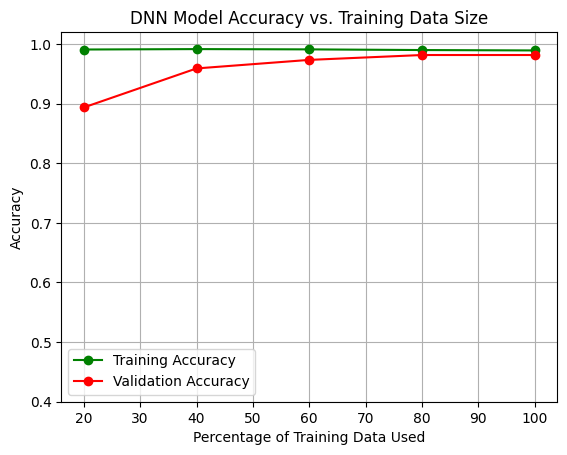

In [19]:
# Split the training data into different sizes (20%, 40%, 60%, 80%, 100%)
train_percentages = [0.2, 0.4, 0.6, 0.8, 1.0]
train_accuracies = []
valid_accuracies = []

# Analyze model performance with different training set sizes
for percentage in train_percentages:
    print(f"Training on {percentage * 100}% of the data")
    if percentage == 1.0:
        X_train_subset = X_train
        Y_train_subset = train_feat_Y
    else:
        X_train_subset, _, Y_train_subset, _ = train_test_split(X_train, Y_train, train_size=percentage, random_state=42)

    # Define and compile the model
    model = Sequential()

    # Input layer using `Input` shape
    model.add(Input(shape=(n_components,)))  # Explicit input layer

    # Hidden layer with 32 neurons and sigmoid activation
    model.add(Dense(32, activation='sigmoid'))

    # Output layer for binary classification
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model with Adam optimizer and binary crossentropy loss
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Fit the model
    model.fit(X_train_subset, Y_train_subset, epochs=30, batch_size=32, validation_data=(X_valid, Y_valid), verbose=0)

    # Evaluate the model on training and validation data
    train_loss, train_accuracy = model.evaluate(X_train_subset, Y_train_subset, verbose=0)
    valid_loss, valid_accuracy = model.evaluate(X_valid, Y_valid, verbose=0)

    # Store accuracies
    train_accuracies.append(train_accuracy)
    valid_accuracies.append(valid_accuracy)

# Create a DataFrame to print the table
data = {
    "Percentage": [int(p * 100) for p in train_percentages],
    "Training Accuracy": train_accuracies,
    "Validation Accuracy": valid_accuracies
}

accuracy_df = pd.DataFrame(data)
print(accuracy_df)

# Plot the accuracies
plt.plot([int(p * 100) for p in train_percentages], train_accuracies, label='Training Accuracy', color='green', marker='o')
plt.plot([int(p * 100) for p in train_percentages], valid_accuracies, label='Validation Accuracy', color='red', marker='o')

# Add labels and title
plt.ylim(0.4, 1.02)
plt.xlabel('Percentage of Training Data Used')
plt.ylabel('Accuracy')
plt.title('DNN Model Accuracy vs. Training Data Size')
plt.legend()
plt.grid(True)
plt.show()